<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

In [23]:
!kaggle datasets download -d uciml/mushroom-classification

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
data_mush = pd.read_csv('mushroom-classification.zip', compression='zip', header=0, sep=',', quotechar='"', encoding = "utf-8")

In [0]:
#Downsample to get 65% imbalance
mush_p_ind = data_mush[data_mush['class'] == 'p'].index
to_del = mush_p_ind[0:int(len(mush_p_ind)*0.43)]
data_mush_imbalanced = data_mush.drop(index=to_del)

#Convert string data to ints
data_mush_imbalanced_ = pd.get_dummies(data_mush_imbalanced)
data_mush_imbalanced_ = data_mush_imbalanced_.drop('class_e', axis=1)

In [26]:
print(data_mush_imbalanced_)

      class_p  cap-shape_b  cap-shape_c  ...  habitat_p  habitat_u  habitat_w
1           0            0            0  ...          0          0          0
2           0            1            0  ...          0          0          0
4           0            0            0  ...          0          0          0
5           0            0            0  ...          0          0          0
6           0            1            0  ...          0          0          0
...       ...          ...          ...  ...        ...        ...        ...
8119        0            0            0  ...          0          0          0
8120        0            0            0  ...          0          0          0
8121        0            0            0  ...          0          0          0
8122        1            0            0  ...          0          0          0
8123        0            0            0  ...          0          0          0

[6441 rows x 116 columns]


In [27]:
print(data_mush_imbalanced_['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_['class_p'].value_counts()[0]/sum(data_mush_imbalanced_.class_p.value_counts()))

0    4208
1    2233
Name: class_p, dtype: int64
Imbalance: 0.6533147026859183


In [0]:
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
def evaluatePerformance(clf, features, labels):
  a = cross_val_score(tree_clf, features, labels, cv=10, scoring='accuracy')
  p = cross_val_score(tree_clf, features, labels, cv=10, scoring='precision')
  r = cross_val_score(tree_clf, features, labels, cv=10, scoring='recall')
  f = cross_val_score(tree_clf, features, labels, cv=10, scoring='f1')

  print("Accuracy:", a.mean(), "+/-", a.std())
  print("Precision:", p.mean(), "+/-", p.std())
  print("Recall:", r.mean(), "+/-", r.std())
  print("F1-Score:", f.mean(), "+/-", f.std())

In [30]:
#Mushroom dataset base scores DT
feat_mush = np.array(data_mush_imbalanced_.drop('class_p', axis=1))
lab_mush = np.array(data_mush_imbalanced_['class_p'])

evaluatePerformance(tree_clf, feat_mush, lab_mush)

Accuracy: 0.9996899224806202 +/- 0.0009302325581395434
Precision: 1.0 +/- 0.0
Recall: 0.9991071428571429 +/- 0.0026785714285714195
F1-Score: 0.9995515695067265 +/- 0.0013452914798206318


In [31]:
#Mushroom dataset base scores RF
evaluatePerformance(rf_clf, feat_mush, lab_mush)

Accuracy: 0.9996899224806202 +/- 0.0009302325581395434
Precision: 1.0 +/- 0.0
Recall: 0.9991071428571429 +/- 0.0026785714285714195
F1-Score: 0.9995515695067265 +/- 0.0013452914798206318


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [32]:
#Downsample MUSHROOM DATASET to get 50%
mush_p_ind_ = data_mush_imbalanced_[data_mush_imbalanced_['class_p'] == 0].index
to_del = mush_p_ind_[0:int(len(mush_p_ind_)*0.46)]
data_mush_imbalanced_test = data_mush_imbalanced_.drop(index=to_del)

print(data_mush_imbalanced_test['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_test['class_p'].value_counts()[0]/(data_mush_imbalanced_test['class_p'].value_counts()[1]+(data_mush_imbalanced_test['class_p'].value_counts()[0])))

0    2273
1    2233
Name: class_p, dtype: int64
Imbalance: 0.5044385264092321


In [33]:
#MUSHROOM DATASET downsampling scores DT
feat_mush_test = data_mush_imbalanced_test.drop('class_p', axis=1)
lab_mush_test = data_mush_imbalanced_test['class_p']

evaluatePerformance(tree_clf, feat_mush_test, lab_mush_test)

Accuracy: 0.9995565410199557 +/- 0.0013303769401330269
Precision: 1.0 +/- 0.0
Recall: 0.9991031390134528 +/- 0.002690582959641263
F1-Score: 0.9995495495495496 +/- 0.001351351351351371


In [34]:
#MUSHROOM DATASET downsampling scores RF
evaluatePerformance(rf_clf, feat_mush_test, lab_mush_test)

Accuracy: 0.9995565410199557 +/- 0.0013303769401330269
Precision: 1.0 +/- 0.0
Recall: 0.9991031390134528 +/- 0.002690582959641263
F1-Score: 0.9995495495495496 +/- 0.001351351351351371


OVERSAMPLING AND TEST RESULTS

In [35]:
#OVERSAMPLING MUSHROOM DATASET
max_ = data_mush_imbalanced_['class_p'].value_counts().max()

temp = [data_mush_imbalanced_]
for class_index, group in data_mush_imbalanced_.groupby('class_p'):
    temp.append(group.sample(max_-len(group), replace=True))
data_mush_over = pd.concat(temp)

print(data_mush_over['class_p'].value_counts())
print("Imbalance:", data_mush_over['class_p'].value_counts()[0]/(data_mush_over['class_p'].value_counts()[1]+(data_mush_over['class_p'].value_counts()[0])))

1    4208
0    4208
Name: class_p, dtype: int64
Imbalance: 0.5


In [36]:
#MUSHROOM DATASET oversampling scores DT
feat_mush_over = data_mush_over.drop('class_p', axis=1)
lab_mush_over = data_mush_over['class_p']

evaluatePerformance(tree_clf, feat_mush_over, lab_mush_over)

Accuracy: 1.0 +/- 0.0
Precision: 1.0 +/- 0.0
Recall: 1.0 +/- 0.0
F1-Score: 1.0 +/- 0.0


In [37]:
#MUSHROOM DATASET oversampling scores RF
evaluatePerformance(rf_clf, feat_mush_over, lab_mush_over)

Accuracy: 1.0 +/- 0.0
Precision: 1.0 +/- 0.0
Recall: 1.0 +/- 0.0
F1-Score: 1.0 +/- 0.0


CREATE 10 FOLDS OF EACH CLASS

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
import utils
from sklearn.metrics.cluster import adjusted_rand_score 

In [39]:
#MUSHROOM DATASET
skf = StratifiedKFold(n_splits=10)
print(lab_mush.shape)

(6441,)


Silhouette method & Elbow method - amount of cluster determination

In [0]:
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifiers = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

finding clusters


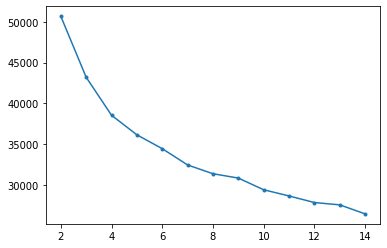

Silhouette predicted 8 clusters. Please enter elbow results:
8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 8
finding clusters


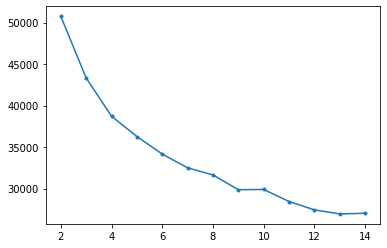

Silhouette predicted 9 clusters. Please enter elbow results:
8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 8
finding clusters


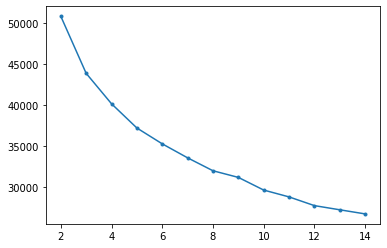

Silhouette predicted 8 clusters. Please enter elbow results:
8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 8
finding clusters


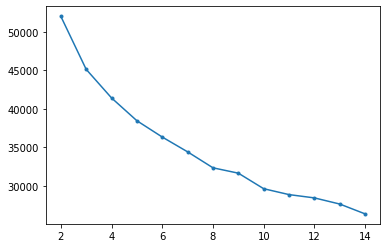

Silhouette predicted 10 clusters. Please enter elbow results:
8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 9


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


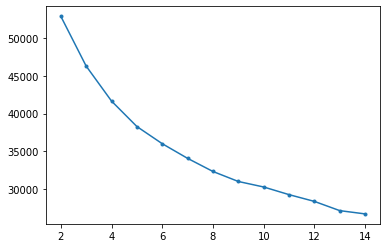

Silhouette predicted 9 clusters. Please enter elbow results:
5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 6
finding clusters


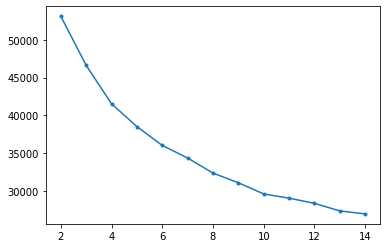

Silhouette predicted 10 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 4
finding clusters


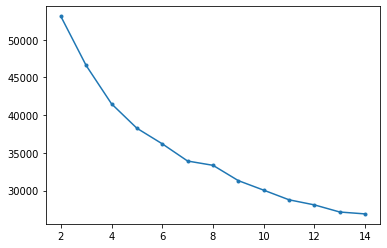

Silhouette predicted 9 clusters. Please enter elbow results:
5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


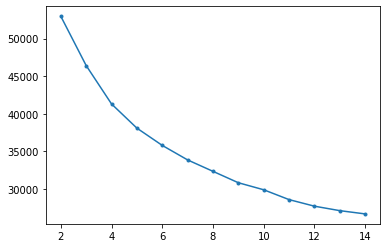

Silhouette predicted 9 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


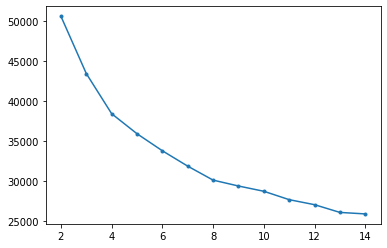

Silhouette predicted 8 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 6
finding clusters


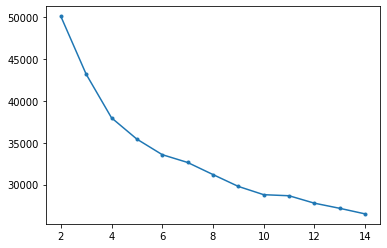

Silhouette predicted 9 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 5


In [41]:
for train, test in skf.split(feat_mush, lab_mush):
  test_labels = []

  #Retrieve the predicted amount of clusters and the best performing KMeans model
  n_clusters, final_model = utils.Utils.cluster_and_model(feat_mush[train], lab_mush[train])

  #Retrieve the clusters containing missclassified data and the indices of these clusters in the training data
  missclassified_cluster_data_index, missclassified_clusters = utils.Utils.find_missclassified_clusters(n_clusters, lab_mush[train], final_model.labels_)
  rf_classifiers = [0]*n_clusters
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_mush[train]
    f1 = f[missclassified_cluster_data_index[i], :]
    l  = lab_mush[train]
    l1 = np.take(l, missclassified_cluster_data_index[i])
    rf_classifiers[i] = random_forest_clf.fit(f1, l1)
  
  #For each point in test dataset, give it a cluster
  for x in feat_mush[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  accuracy_scores.append(accuracy_score(test_labels, lab_mush[test]))
  precision_scores.append(precision_score(test_labels, lab_mush[test]))
  recall_scores.append(recall_score(test_labels, lab_mush[test]))
  f1_scores.append(f1_score(test_labels, lab_mush[test]))
  

In [44]:
print("Accuracy:", np.mean(accuracy_scores), "+/-", np.std(accuracy_scores))
print("Precision:", np.mean(precision_scores), "+/-", np.std(precision_scores))
print("Recall:", np.mean(recall_scores), "+/-", np.std(recall_scores))
print("F1-Score:", np.mean(f1_scores), "+/-", np.std(f1_scores))
#print("adjusted rand-Score:", np.mean(ajd_rand), "+/-", np.std(ajd_rand))

Accuracy: 0.7422795994029563 +/- 0.2294974597072025
Precision: 0.6093589846252403 +/- 0.4616912472939813
Recall: 0.5725152652100346 +/- 0.4456030783719475
F1-Score: 0.5335749148271802 +/- 0.41518430588880256
